In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
X_train=pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 45 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   index                       1199861 non-null  int64  
 1   acc_now_delinq              1199861 non-null  float64
 2   addr_state                  1199861 non-null  object 
 3   annual_inc                  1199861 non-null  float64
 4   chargeoff_within_12_mths    1199824 non-null  float64
 5   collections_12_mths_ex_med  1199824 non-null  float64
 6   delinq_2yrs                 1199861 non-null  float64
 7   dti                         1199861 non-null  float64
 8   earliest_cr_line            1199861 non-null  object 
 9   emp_length                  1128114 non-null  object 
 10  fico_range_high             1199861 non-null  float64
 11  fico_range_low              1199861 non-null  float64
 12  funded_amnt                 1199861 non-null  float64
 1

In [4]:
X_train

,index,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,...,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
0,0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,...,1.0,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx
1,1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,...,1.0,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx
2,2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,...,0.0,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx
3,3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,...,0.0,0.0,car,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx
4,4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,...,0.0,0.0,other,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,1199856,0.0,IL,41000.0,0.0,0.0,0.0,22.97,Feb-2002,4 years,...,0.0,0.0,debt_consolidation,82.1%,0.0,36 months,debt consolidation,8.0,Source Verified,604xx
1199857,1199857,0.0,NY,95000.0,0.0,0.0,0.0,25.63,Jan-2002,3 years,...,0.0,0.0,credit_card,82.3%,0.0,36 months,Credit cards financing,29.0,Verified,106xx
1199858,1199858,0.0,MA,61000.0,0.0,0.0,0.0,15.58,Nov-2002,8 years,...,0.0,0.0,home_improvement,6%,0.0,60 months,Home improvement,26.0,Source Verified,021xx
1199859,1199859,0.0,OH,35000.0,0.0,0.0,0.0,24.07,Nov-1991,5 years,...,0.0,0.0,debt_consolidation,76.2%,0.0,60 months,Debt,52.0,Verified,454xx


In [5]:
y_train

,index,loan_status
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
1199856,1199856,0
1199857,1199857,0
1199858,1199858,0
1199859,1199859,0


In [6]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1199861.0,599930.000000,346370.180008,0.00,299965.00,599930.00,899895.00,1.199860e+06
acc_now_delinq,1199861.0,0.004626,0.072842,0.00,0.00,0.00,0.00,6.000000e+00
annual_inc,1199861.0,78110.512218,136351.414907,2300.00,47000.00,65000.00,93000.00,1.100000e+08
chargeoff_within_12_mths,1199824.0,0.008901,0.108155,0.00,0.00,0.00,0.00,1.000000e+01
collections_12_mths_ex_med,1199824.0,0.018102,0.150731,0.00,0.00,0.00,0.00,2.000000e+01
delinq_2yrs,1199861.0,0.314226,0.876369,0.00,0.00,0.00,0.00,4.200000e+01
dti,1199861.0,18.038746,8.404678,-1.00,11.74,17.55,23.97,4.996000e+01
fico_range_high,1199861.0,701.200282,32.341045,664.00,674.00,694.00,719.00,8.500000e+02
fico_range_low,1199861.0,697.200134,32.340365,660.00,670.00,690.00,715.00,8.450000e+02
funded_amnt,1199861.0,14404.663894,8855.222599,500.00,7675.00,12000.00,20000.00,4.000000e+04


In [7]:
print(X_train[~X_train.applymap(np.isreal).all(1)])
null_columns=X_train.columns[X_train.isnull().any()]
print(X_train[X_train.isnull().any(axis=1)][null_columns].head())

           index  acc_now_delinq addr_state  annual_inc  \
0              0             0.0         UT     80000.0   
1              1             0.0         CA     82000.0   
2              2             0.0         NV     46080.0   
3              3             0.0         AZ     30000.0   
4              4             0.0         OH     70000.0   
...          ...             ...        ...         ...   
1199856  1199856             0.0         IL     41000.0   
1199857  1199857             0.0         NY     95000.0   
1199858  1199858             0.0         MA     61000.0   
1199859  1199859             0.0         OH     35000.0   
1199860  1199860             0.0         TX     70000.0   

         chargeoff_within_12_mths  collections_12_mths_ex_med  delinq_2yrs  \
0                             0.0                         0.0          0.0   
1                             0.0                         0.0          0.0   
2                             0.0                        

In [8]:
X_train['issue_d'].describe()

count      1199861
unique         160
top       Mar-2016
freq         37886
Name: issue_d, dtype: object

In [9]:
labels_to_kill=['index','acc_now_delinq','addr_state','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs','pub_rec','pub_rec_bankruptcies','tax_liens','term','title','zip_code','open_il_24m','open_rv_24m','inq_last_12m','mths_since_recent_bc_dlq','num_accts_ever_120_pd','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','mths_since_last_delinq','issue_d']
labels_to_fill=['dti','revol_util','total_acc','mort_acc','num_actv_bc_tl','num_tl_op_past_12m','percent_bc_gt_75','int_rate']
string_labels=['purpose','verification_status','home_ownership'] 
labels_to_kill
# term

['index',
 'acc_now_delinq',
 'addr_state',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'pub_rec',
 'pub_rec_bankruptcies',
 'tax_liens',
 'term',
 'title',
 'zip_code',
 'open_il_24m',
 'open_rv_24m',
 'inq_last_12m',
 'mths_since_recent_bc_dlq',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'mths_since_last_delinq',
 'issue_d']

In [10]:
X_train = X_train.drop(labels_to_kill,axis=1)
indexes=X_test['index']
X_test = X_test.drop(labels_to_kill,axis=1)
y_train = y_train.drop(['index'], axis=1)

In [11]:
X_train['earliest_cr_line'] = pd.to_datetime(X_train['earliest_cr_line']).sub(pd.Timestamp('1930-01-01')).dt.days.astype(float)
X_test['earliest_cr_line'] = pd.to_datetime(X_train['earliest_cr_line']).sub(pd.Timestamp('1930-01-01')).dt.days.astype(float)

In [12]:
for df in [X_test,X_train]:
    df['emp_length']= df['emp_length'].apply(lambda x: str(x).replace('10+ ','10 '))
    df['emp_length'] = df['emp_length'].apply(lambda x: x.replace('years',''))
    df['emp_length']= df['emp_length'].apply(lambda x: x.replace('year',''))
    df['emp_length']= df['emp_length'].apply(lambda x: x.replace('<',''))
    df['emp_length'] = df['emp_length'].astype(float)

In [13]:
label_encoder = preprocessing.LabelEncoder()
for df in [X_train,X_test]:
    for x in string_labels:
        label_encoder.fit(df[x])
        df[x]= label_encoder.transform(df[x]).astype(float)

In [14]:
for df in [X_train,X_test]:
    df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x).replace('%',''))/100.0)
    df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%',''))/100.0)

In [15]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   annual_inc             1199861 non-null  float64
 1   dti                    1199861 non-null  float64
 2   earliest_cr_line       1199861 non-null  float64
 3   emp_length             1199861 non-null  float64
 4   fico_range_high        1199861 non-null  float64
 5   fico_range_low         1199861 non-null  float64
 6   funded_amnt            1199861 non-null  float64
 7   home_ownership         1199861 non-null  float64
 8   installment            1199861 non-null  float64
 9   int_rate               1199861 non-null  float64
 10  loan_amnt              1199861 non-null  float64
 11  mort_acc               1199861 non-null  float64
 12  mths_since_recent_inq  1199861 non-null  float64
 13  num_actv_bc_tl         1199861 non-null  float64
 14  num_rev_accts     

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590977 entries, 0 to 590976
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   annual_inc             590977 non-null  float64
 1   dti                    590977 non-null  float64
 2   earliest_cr_line       590977 non-null  float64
 3   emp_length             590977 non-null  float64
 4   fico_range_high        590977 non-null  float64
 5   fico_range_low         590977 non-null  float64
 6   funded_amnt            590977 non-null  float64
 7   home_ownership         590977 non-null  float64
 8   installment            590977 non-null  float64
 9   int_rate               590977 non-null  float64
 10  loan_amnt              590977 non-null  float64
 11  mort_acc               590977 non-null  float64
 12  mths_since_recent_inq  590977 non-null  float64
 13  num_actv_bc_tl         590977 non-null  float64
 14  num_rev_accts          590977 non-nu

In [18]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 1 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   loan_status  1199861 non-null  int64
dtypes: int64(1)
memory usage: 9.2 MB


In [19]:
train_df=pd.concat([X_train,y_train],axis=1)
train_df

,annual_inc,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,installment,int_rate,...,num_rev_accts,num_sats,num_tl_op_past_12m,open_acc,percent_bc_gt_75,purpose,revol_util,total_acc,verification_status,loan_status
0,80000.0,30.49,24380.0,4.0,689.0,685.0,16000.0,5.0,539.03,0.1299,...,17.000000,14.000000,3.000000,14.0,100.0,1.0,0.561,26.0,1.0,1
1,82000.0,7.00,23070.0,10.0,689.0,685.0,6600.0,1.0,214.27,0.1042,...,8.000000,5.000000,0.000000,5.0,100.0,1.0,0.883,11.0,0.0,0
2,46080.0,17.32,25872.0,3.0,674.0,670.0,10000.0,1.0,317.96,0.0899,...,23.000000,7.000000,0.000000,7.0,0.0,1.0,0.181,31.0,1.0,1
3,30000.0,7.80,29220.0,1.0,694.0,690.0,3000.0,4.0,98.98,0.1153,...,11.000000,19.000000,4.000000,19.0,0.0,0.0,0.334,24.0,1.0,0
4,70000.0,13.36,26298.0,1.0,674.0,670.0,20000.0,5.0,602.37,0.2630,...,3.000000,4.000000,0.000000,4.0,100.0,9.0,0.886,16.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199856,41000.0,22.97,26329.0,4.0,684.0,680.0,10000.0,5.0,348.18,0.1531,...,14.329876,11.645935,2.156888,5.0,100.0,2.0,0.821,8.0,1.0,0
1199857,95000.0,25.63,26298.0,3.0,709.0,705.0,17000.0,5.0,517.41,0.0603,...,20.000000,18.000000,0.000000,18.0,83.3,1.0,0.823,29.0,2.0,0
1199858,61000.0,15.58,26602.0,8.0,774.0,770.0,30000.0,4.0,667.19,0.1199,...,24.000000,23.000000,4.000000,23.0,0.0,4.0,0.060,26.0,1.0,0
1199859,35000.0,24.07,22584.0,5.0,719.0,715.0,17325.0,1.0,486.22,0.2278,...,14.329876,26.000000,2.156888,26.0,33.3,2.0,0.762,52.0,2.0,0


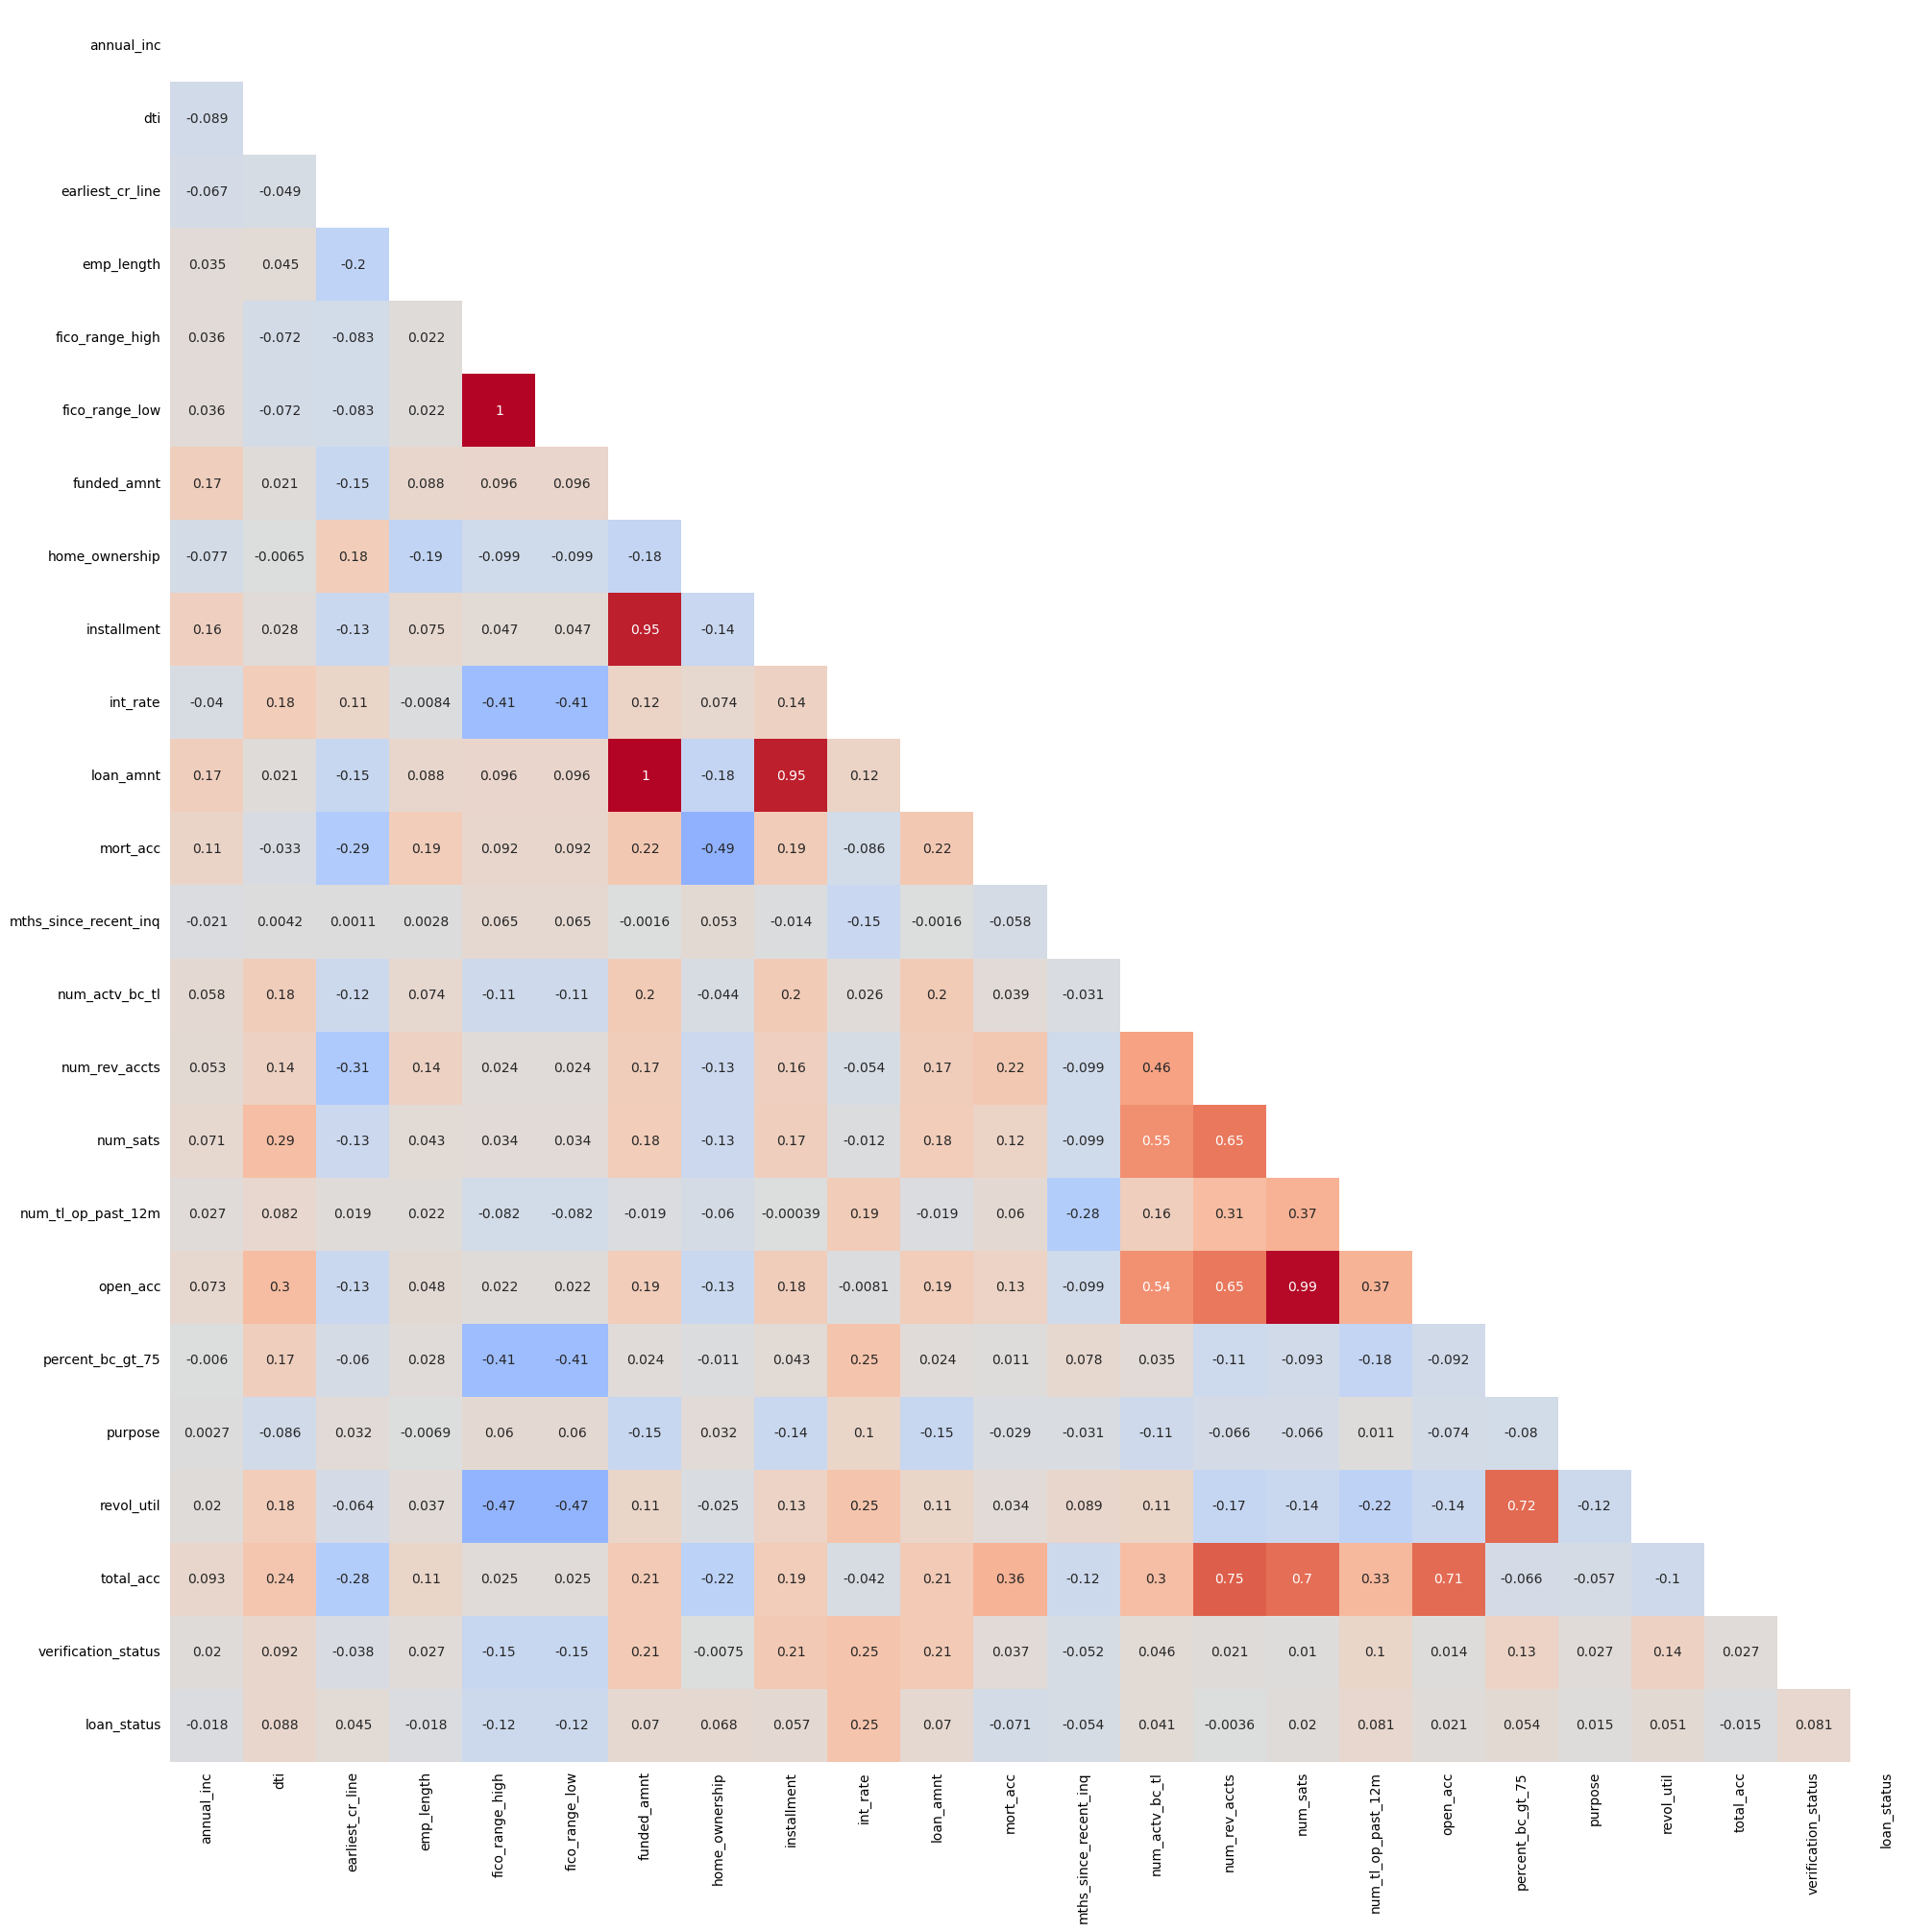

In [20]:
fig, ax = plt.subplots(figsize=(20, 20), constrained_layout=True)
corr_df=train_df
corr =corr_df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cbar=False, mask=mask,ax=ax,annot=True, cmap='coolwarm',vmin=-1,vmax=1)
ax.tick_params(top=False,bottom=False,left=False,right=False,)

In [21]:
# fig, ax = plt.subplots(figsize=(20, 20))
# labels=[]
# sns.pairplot(X_test)
# plt.show()

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.23396549,  2.01569425, -3.82349717, ...,  0.44828794,
        -0.38518626,  1.32632743],
       [-0.25383328,  0.26309815, -3.82349717, ...,  0.32285497,
         0.61047541, -1.2550851 ],
       [-0.04481446, -0.24495245, -3.82349717, ..., -0.17887693,
         0.94236264,  1.32632743],
       ...,
       [-0.26483427,  0.42372305, -3.82349717, ...,  0.69106144,
        -0.21924265,  0.03562117],
       [ 0.08719743,  0.18457043, -3.82349717, ..., -0.84245782,
         1.02533444, -1.2550851 ],
       [-0.05948245, -0.34489683, -3.82349717, ...,  1.17660843,
         1.27424986,  0.03562117]])

In [23]:
# RandomForest - 0.805496752398891
# LinearRegression - 0.0487073239842033
# KNearestneighbors - 0.7431005839570172
# LogisticRegression - 0.8067905706464249
                                                    
train_data_X=X_train[:-int(len(X_train.axes[0])*0.13)]
test_data_X=X_train[-int(len(X_train.axes[0])*0.13):]
train_data_y=y_train[:-int(len(y_train.axes[0])*0.13)]
test_data_y=y_train[-int(len(y_train.axes[0])*0.13):]

model = LogisticRegression(solver='newton-cholesky')
model.fit(train_data_X, train_data_y)
print(model.predict_proba(test_data_X))
accuracy = model.score(test_data_X,test_data_y)
print(accuracy)



C:\Users\Юля\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.77035389 0.22964611]
 [0.67556746 0.32443254]
 [0.82917597 0.17082403]
 ...
 [0.71654959 0.28345041]
 [0.70758351 0.29241649]
 [0.61937337 0.38062663]]
0.8075791282271558


In [24]:
model.predict_proba(test_data_X)[:,1]

array([0.22964611, 0.32443254, 0.17082403, ..., 0.28345041, 0.29241649,
       0.38062663])

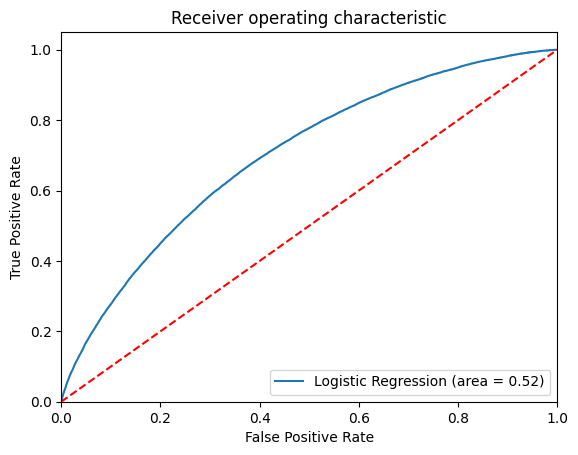

In [25]:
logit_roc_auc = roc_auc_score(test_data_y, model.predict(test_data_X))
fpr, tpr, thresholds = roc_curve(test_data_y, model.predict_proba(test_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [26]:
colum_label = list(X_train.columns) 
model_Coeff = pd.DataFrame(model.coef_, columns = colum_label)
model_Coeff['intercept'] = model.intercept_
print("Coefficient Values Of The Surface Are: ", model_Coeff)

Coefficient Values Of The Surface Are:     annual_inc       dti  earliest_cr_line  emp_length  fico_range_high  \
0   -0.000001  0.016916          0.000008    -0.00693         0.807282   

   fico_range_low  funded_amnt  home_ownership  installment  int_rate  ...  \
0       -0.813813     0.000065        0.059122    -0.002135  9.734804  ...   

   num_rev_accts  num_sats  num_tl_op_past_12m  open_acc  percent_bc_gt_75  \
0       0.002436 -0.004665            0.063322  0.004343          0.000726   

    purpose  revol_util  total_acc  verification_status  intercept  
0  0.014282   -0.305812  -0.009347             0.021271  -2.203453  

[1 rows x 24 columns]


In [27]:
model.fit(X_train,y_train)
predictions = model.predict_proba(X_test)

C:\Users\Юля\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
model.classes_

array([0, 1], dtype=int64)

In [29]:
output = pd.DataFrame({'index': indexes, 'loan_status':predictions[:,1]})
output.to_csv('answer.csv', index=False)
print('Finished!')

Finished!
